<a href="https://colab.research.google.com/github/zapjur/Digital-Signal-Processing/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zad 1**

In [4]:
import numpy as np

N = 20

def generate_dct_ii_matrix(N):
    matrix = np.zeros((N, N))
    for k in range(N):
        for n in range(N):
            if k == 0:
                matrix[k, n] = np.sqrt(1/N)
            else:
                matrix[k, n] = np.sqrt(2/N) * np.cos((np.pi * k * (2*n + 1)) / (2 * N))
    return matrix

dct_ii_matrix = generate_dct_ii_matrix(N)

# Iloczyn skalarny każdej pary różnych wektorów powinien wynosić 0, a każdego wektora z samym sobą 1
is_orthonormal = True

for i in range(N):
    for j in range(i, N):
        dot_product = np.dot(dct_ii_matrix[i], dct_ii_matrix[j])

        if i == j:
            # Dla tej samej pary wektorów oczekujemy wartości 1
            if not np.isclose(dot_product, 1):
                is_orthonormal = False
                break
        else:
            # Dla różnych wektorów oczekujemy wartości bliskiej 0
            if not np.isclose(dot_product, 0):
                is_orthonormal = False
                break

    if not is_orthonormal:
        break


print(f"Czy macierz DCT-II jest ortonormalna? {is_orthonormal}")



Czy macierz DCT-II jest ortonormalna? True




---


**Zad 2**

In [6]:
import numpy as np

N = 20
A = generate_dct_ii_matrix(N)
S = np.transpose(A)

I = np.dot(S, A)
tolA = np.max(np.abs(S - np.linalg.inv(A)))

isidentic = True

for o in range(N):
    for p in range(N):
        if abs(I[o, p]) != 0 and o != p:
            isidentic = False

        if abs(I[o, p]) != 1 and o == p:
            isidentic = False

if isidentic:
    print(f'Macierz I jest identycznościowa z błędem: {tolA}')
else:
    print('Macierz I nie jest identycznościowa')

srand = np.random.rand(N)
X = np.dot(A, srand)

rcnst = np.dot(S, X)

tolB = np.max(np.abs(srand - rcnst))

if tolB < 1e-10:
    print(f'Rekonstrukcja sygnału z błędem: {tolB}')


Macierz I nie jest identycznościowa
Rekonstrukcja sygnału z błędem: 1.0824674490095276e-15



---


**Zad 3**

Rekonstrukcja sygnału z błędem: 5.968558980384842e-13


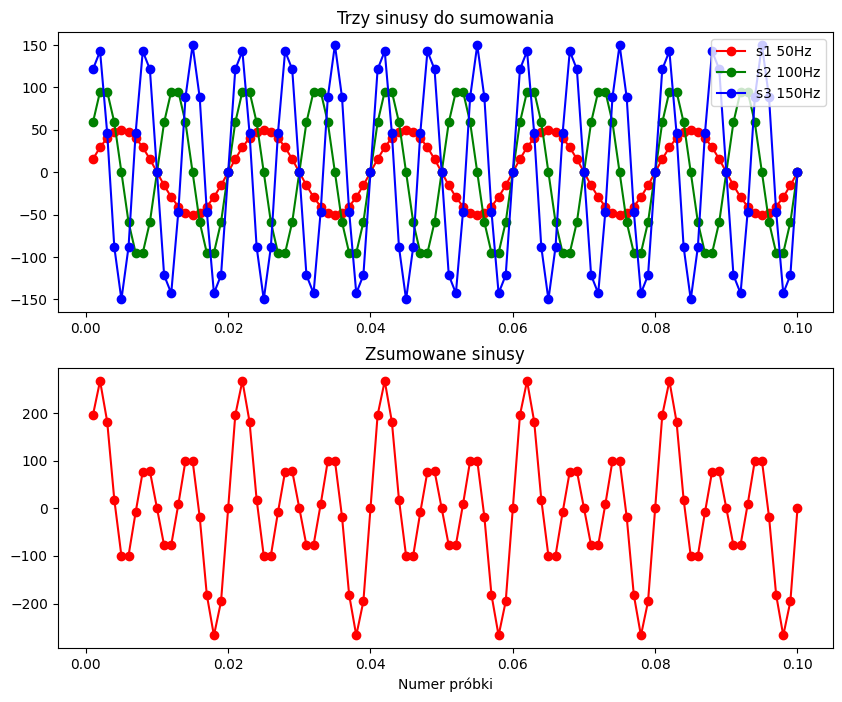

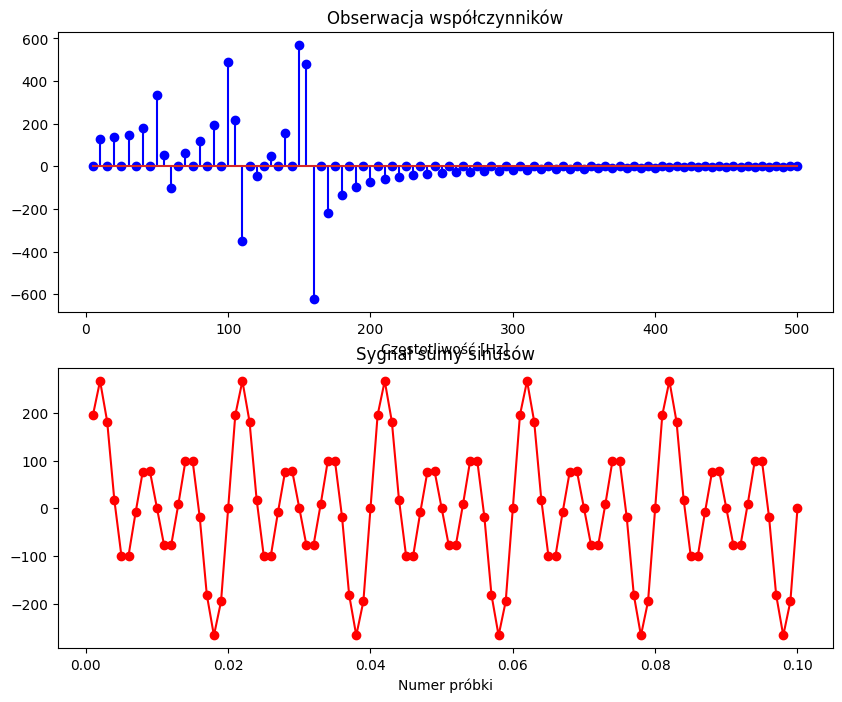

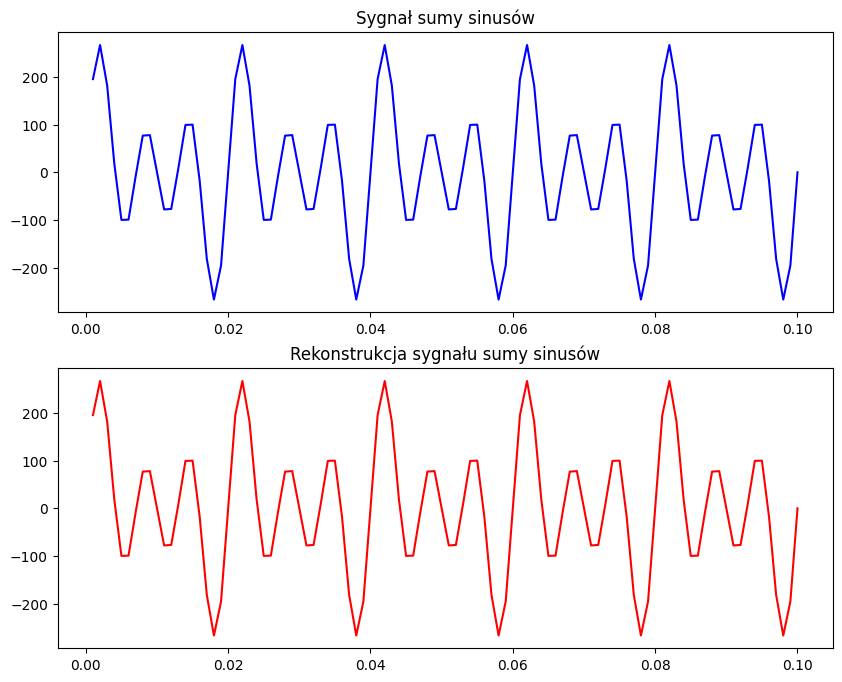

Rekonstrukcja sygnału z błędem: 5.258016244624741e-13


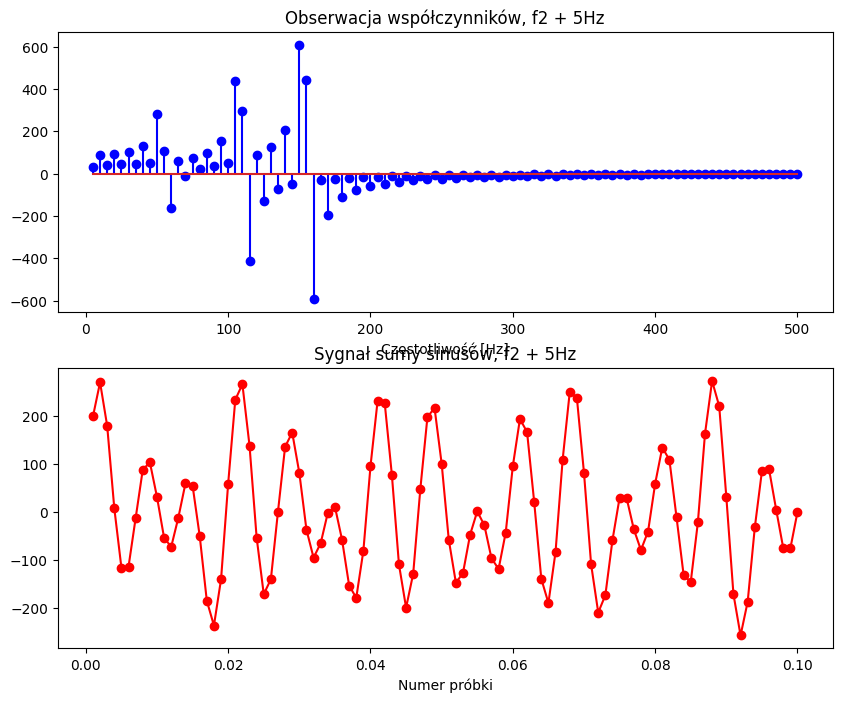

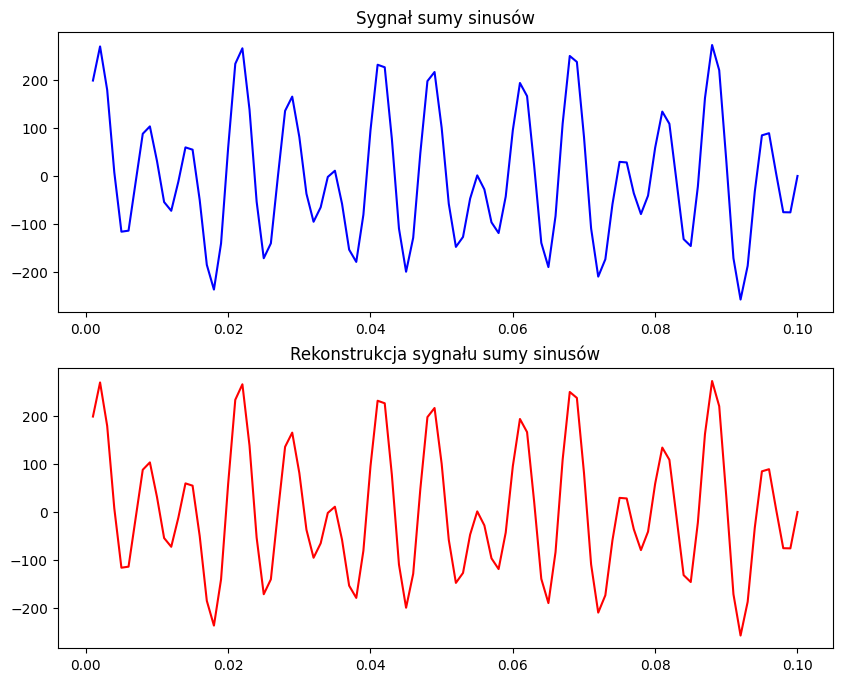

Rekonstrukcja sygnału z błędem: 9.237055564881302e-13


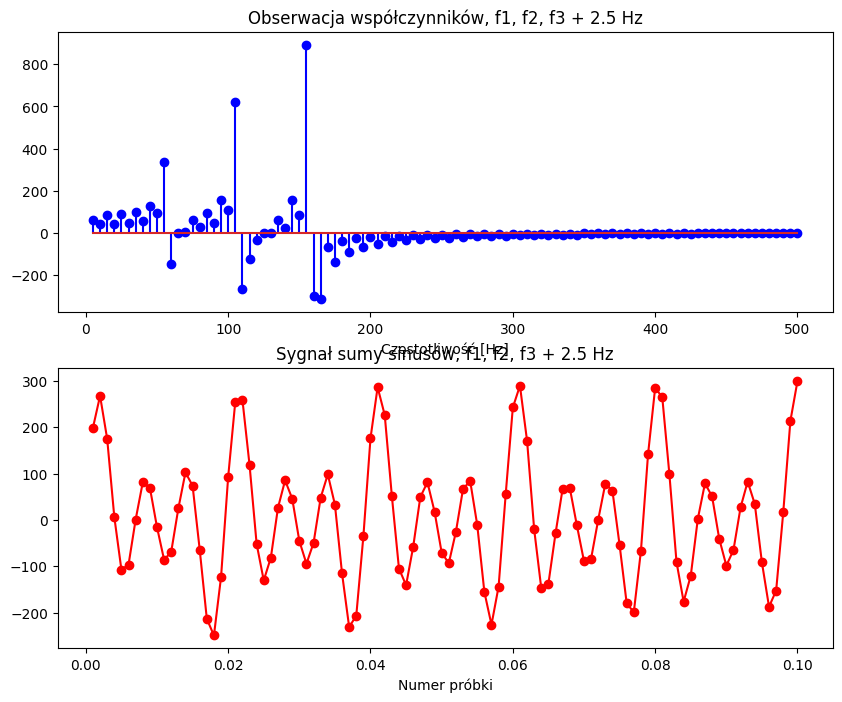

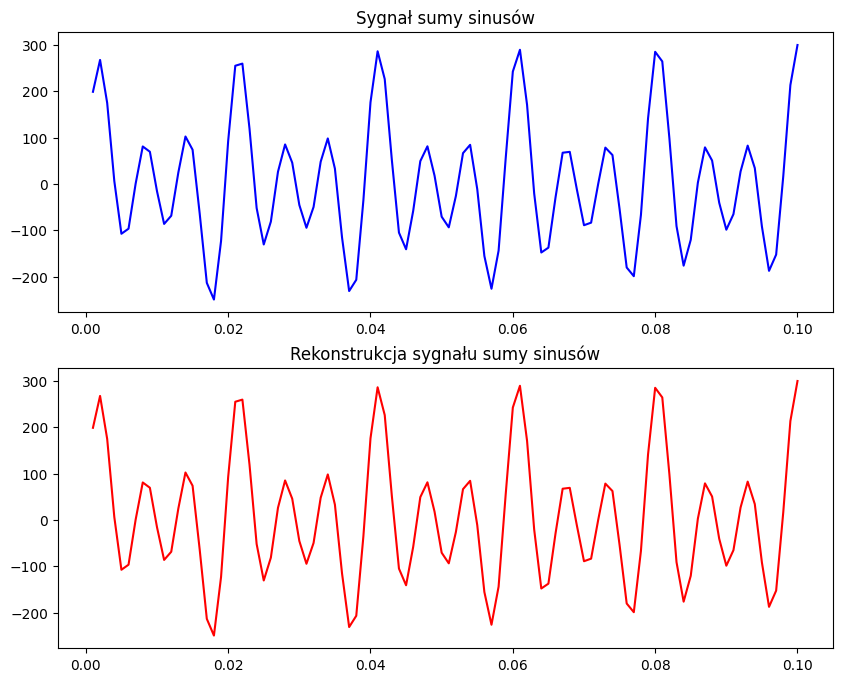

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
N = 100    # liczba próbek
fs = 1000  # częstotliwość próbkowania
st = 1/fs  # krok próbkowania
T = 0.1    # czas trwania próbkowania (100 próbek dla 1000Hz = 0.1s)

sample = np.arange(st, T+st, st)  # przedział czasowy próbkowania

# Częstotliwości sinusoid
f1 = 50
f2 = 100
f3 = 150

# Amplitudy sinusoid
A1 = 50
A2 = 100
A3 = 150

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.sin(2*np.pi*f1*t)
s2 = lambda t: A2 * np.sin(2*np.pi*f2*t)
s3 = lambda t: A3 * np.sin(2*np.pi*f3*t)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample) + s3(sample)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sample, s1(sample), 'r-o', label='s1 50Hz')
plt.plot(sample, s2(sample), 'g-o', label='s2 100Hz')
plt.plot(sample, s3(sample), 'b-o', label='s3 150Hz')
plt.title('Trzy sinusy do sumowania')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Zsumowane sinusy')
plt.xlabel('Numer próbki')

# Budowanie macierzy A=DCT i S=IDCT dla 100 próbek
A = generate_dct_ii_matrix(N)

S = np.linalg.inv(A)

# Analiza sygnału y=Ax
y = np.dot(A, x)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
f = np.arange(1, N+1) * fs / (2 * N)
plt.stem(f, y, 'b')
plt.title('Obserwacja współczynników')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Sygnał sumy sinusów')
plt.xlabel('Numer próbki')

# Rekonstrukcja sygnału
rcnst = np.dot(S, y)

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol = np.max(np.abs(x - rcnst))
print(f'Rekonstrukcja sygnału z błędem: {tol}')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sample, x, 'b')
plt.title('Sygnał sumy sinusów')

plt.subplot(2, 1, 2)
plt.plot(sample, rcnst, 'r')
plt.title('Rekonstrukcja sygnału sumy sinusów')

plt.show()

# Zmiana f2 na 105 Hz
f2 = 105
s2 = lambda t: A2 * np.sin(2*np.pi*f2*t)
x = s1(sample) + s2(sample) + s3(sample)

# Analiza sygnału y=Ax
y = np.dot(A, x)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
f = np.arange(1, N+1) * fs / (2 * N)
plt.stem(f, y, 'b')
plt.title('Obserwacja współczynników, f2 + 5Hz')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Sygnał sumy sinusów, f2 + 5Hz')
plt.xlabel('Numer próbki')

# Rekonstrukcja sygnału
rcnst = np.dot(S, y)

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol = np.max(np.abs(x - rcnst))
print(f'Rekonstrukcja sygnału z błędem: {tol}')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sample, x, 'b')
plt.title('Sygnał sumy sinusów')

plt.subplot(2, 1, 2)
plt.plot(sample, rcnst, 'r-')
plt.title('Rekonstrukcja sygnału sumy sinusów')

plt.show()

# Zmiana częstotliwości o 2.5 Hz
f1 = 52.5
f2 = 102.5
f3 = 152.5

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.sin(2*np.pi*f1*t)
s2 = lambda t: A2 * np.sin(2*np.pi*f2*t)
s3 = lambda t: A3 * np.sin(2*np.pi*f3*t)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample) + s3(sample)

# Analiza sygnału y=Ax
y = np.dot(A, x)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
f = np.arange(1, N+1) * fs / (2 * N)
plt.stem(f, y, 'b')
plt.title('Obserwacja współczynników, f1, f2, f3 + 2.5 Hz')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Sygnał sumy sinusów, f1, f2, f3 + 2.5 Hz')
plt.xlabel('Numer próbki')

# Rekonstrukcja sygnału
rcnst = np.dot(S, y)

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol = np.max(np.abs(x - rcnst))
print(f'Rekonstrukcja sygnału z błędem: {tol}')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(sample, x, 'b')
plt.title('Sygnał sumy sinusów')

plt.subplot(2, 1, 2)
plt.plot(sample, rcnst, 'r')
plt.title('Rekonstrukcja sygnału sumy sinusów')

plt.show()
